#  MUSHROOM PROJECT

### Data Description

Obective: Provided data of 8124 mushroom samples; Identify and classify as definitely edible, definitely poisonous, or 
of unknown edibility and not recommended.Observed model to be used Classification Model.

###    Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
data=pd.read_csv("Mushroomdata.csv")
ds=pd.DataFrame(data=data)

In [4]:
#pd.set_option('display.max_rows',None) #To see the full rows and values.
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [1]:
# Data has 8124 samples and 22 different features.
#All values are in string format and hence Label encoder will be used to convert the values.

In [2]:
data.keys()

NameError: name 'data' is not defined

In [7]:
ds.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
ds.shape

(8124, 23)

### Analysing Data

In [9]:
ds.isnull().sum() #checking for Null Values and from below table there isn't any Null Values.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Text(0, 0.5, 'Count')

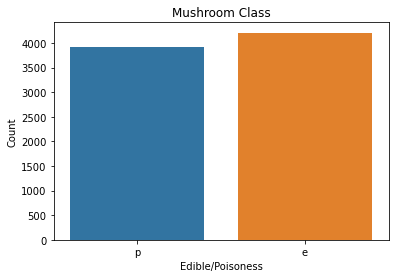

In [10]:
ax=sns.countplot(ds['class']) #plotting the target Variable.
plt.title("Mushroom Class")
plt.xlabel("Edible/Poisoness")
plt.ylabel("Count")

<Figure size 1008x432 with 0 Axes>

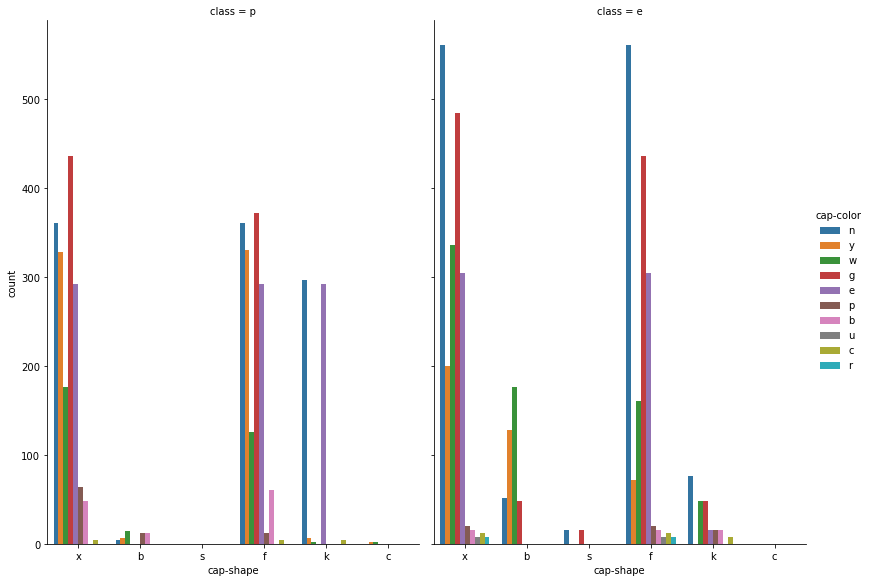

In [11]:
plt.figure(figsize=(14,6))
g=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=data,kind='count',height=8,aspect=.7)

### DATA PREPROCESSING

In [12]:
labelencoder=LabelEncoder() #Data is categorical so converted it with Label encoder to numeric value.
for column in ds.columns:
    ds[column]=labelencoder.fit_transform(ds[column])

In [13]:
ds.describe() #Label Encoded data.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [14]:
y=data['class']
x=data.drop('class',axis=1) #Assigned target variable to y and all other columns to x.
#From the data Veil-type column observed as 0 for all values and hence dropping it.
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [15]:
scaler=StandardScaler() #scaling the data to convert it to similar ranges.
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


### TRAINING THE NETWORK

In [16]:
#Finding the best Random state.
#maxaccu=0
#maxrs=0 
#for i in range(1,200):
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    #lr=LogisticRegression()
    #lr.fit(x_train,y_train)
    #pred=lr.predict(x_test)
    #acc=accuracy_score(y_test,pred)
    #if acc>maxaccu:
        #maxaccu=acc
        #maxrs=i
#print("best accuracy is:",maxaccu,"on random state",maxrs)

#####   We found the Best random state value as 172.We will create our train test split using this random state

In [17]:
#creating Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=172)

#### FINDING THE BEST MODEL

In [18]:
model=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [19]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    preddm=m.predict(x_test)
    print("Accuracy score of",m,"is:")
    print(accuracy_score(y_test,preddm))
    print(confusion_matrix(y_test,preddm))
    print(classification_report(y_test,preddm))
    print("\n")

Accuracy score of LogisticRegression() is:
0.9675963904840033
[[1212   39]
 [  40 1147]]
              precision    recall  f1-score   support

           e       0.97      0.97      0.97      1251
           p       0.97      0.97      0.97      1187

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



Accuracy score of KNeighborsClassifier() is:
1.0
[[1251    0]
 [   0 1187]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1251
           p       1.00      1.00      1.00      1187

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Accuracy score of SVC() is:
1.0
[[1251    0]
 [   0 1187]]
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1251
         

#### CROSS VALIDATING THE RESULTS OF ALL MODELS

In [20]:
from sklearn.model_selection import cross_val_score
modelval=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [21]:
for j in modelval:
    scr=cross_val_score(j,x,y,cv=5)
    print("Cross Validated score for",j, "is:",scr.mean())

Cross Validated score for LogisticRegression() is: 0.8301065555134521
Cross Validated score for KNeighborsClassifier() is: 0.8797053429329292
Cross Validated score for SVC() is: 0.8702213717317167
Cross Validated score for DecisionTreeClassifier() is: 0.9005120121258052


### Best Model Observed is Decision Tree Classifier with cross validated score 0.92